In [1]:
import numpy as np 
import pandas as pd
#from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
#from sklearn import manifold, datasets 
#from sklearn.cluster import AgglomerativeClustering 
#from sklearn.datasets import make_blobs


In [2]:
x = pd.read_csv('car2.csv')
print ("Shape of dataset: ", x.shape)
x.head()

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [3]:
x.dtypes

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object

In [4]:
print ("Shape of dataset before cleaning: ", x.size)
x[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = x[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')


Shape of dataset before cleaning:  2544
manufact      2
model         0
sales         2
resale       38
type          2
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64


In [5]:
x = x.dropna()
x = x.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", x.size)
x.head()

Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [6]:
featureset = x[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 
                'curb_wgt', 
                'fuel_cap', 'mpg']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
y = featureset.values 
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(y)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [8]:
import scipy
f = feature_mtx.shape[0]
D = scipy.zeros([f,f])
#D = np.zeros([f,f])
for i in range(f):
    for j in range(f):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i],
                                                  feature_mtx[j])
D

C:\Users\Student\AppData\Local\Temp\ipykernel_2260\3399007150.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([f,f])


array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [9]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')
Z

C:\Users\Student\AppData\Local\Temp\ipykernel_2260\2533680889.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


array([[3.60000000e+01, 9.20000000e+01, 5.30569369e-03, 2.00000000e+00],
       [2.80000000e+01, 9.00000000e+01, 1.11182906e-02, 2.00000000e+00],
       [1.12000000e+02, 1.16000000e+02, 1.19477571e-02, 2.00000000e+00],
       [2.10000000e+01, 1.04000000e+02, 2.20380776e-02, 2.00000000e+00],
       [2.60000000e+01, 9.10000000e+01, 5.08875182e-02, 2.00000000e+00],
       [4.10000000e+01, 7.40000000e+01, 5.51219450e-02, 2.00000000e+00],
       [7.60000000e+01, 8.40000000e+01, 7.30546036e-02, 2.00000000e+00],
       [1.90000000e+01, 9.50000000e+01, 1.38180998e-01, 2.00000000e+00],
       [4.00000000e+01, 7.30000000e+01, 1.46458028e-01, 2.00000000e+00],
       [4.20000000e+01, 7.50000000e+01, 1.52430867e-01, 2.00000000e+00],
       [1.60000000e+01, 8.60000000e+01, 1.65373067e-01, 2.00000000e+00],
       [1.01000000e+02, 1.02000000e+02, 1.68979409e-01, 2.00000000e+00],
       [9.90000000e+01, 1.00000000e+02, 1.78730919e-01, 2.00000000e+00],
       [1.10000000e+01, 9.70000000e+01, 1.99570647e

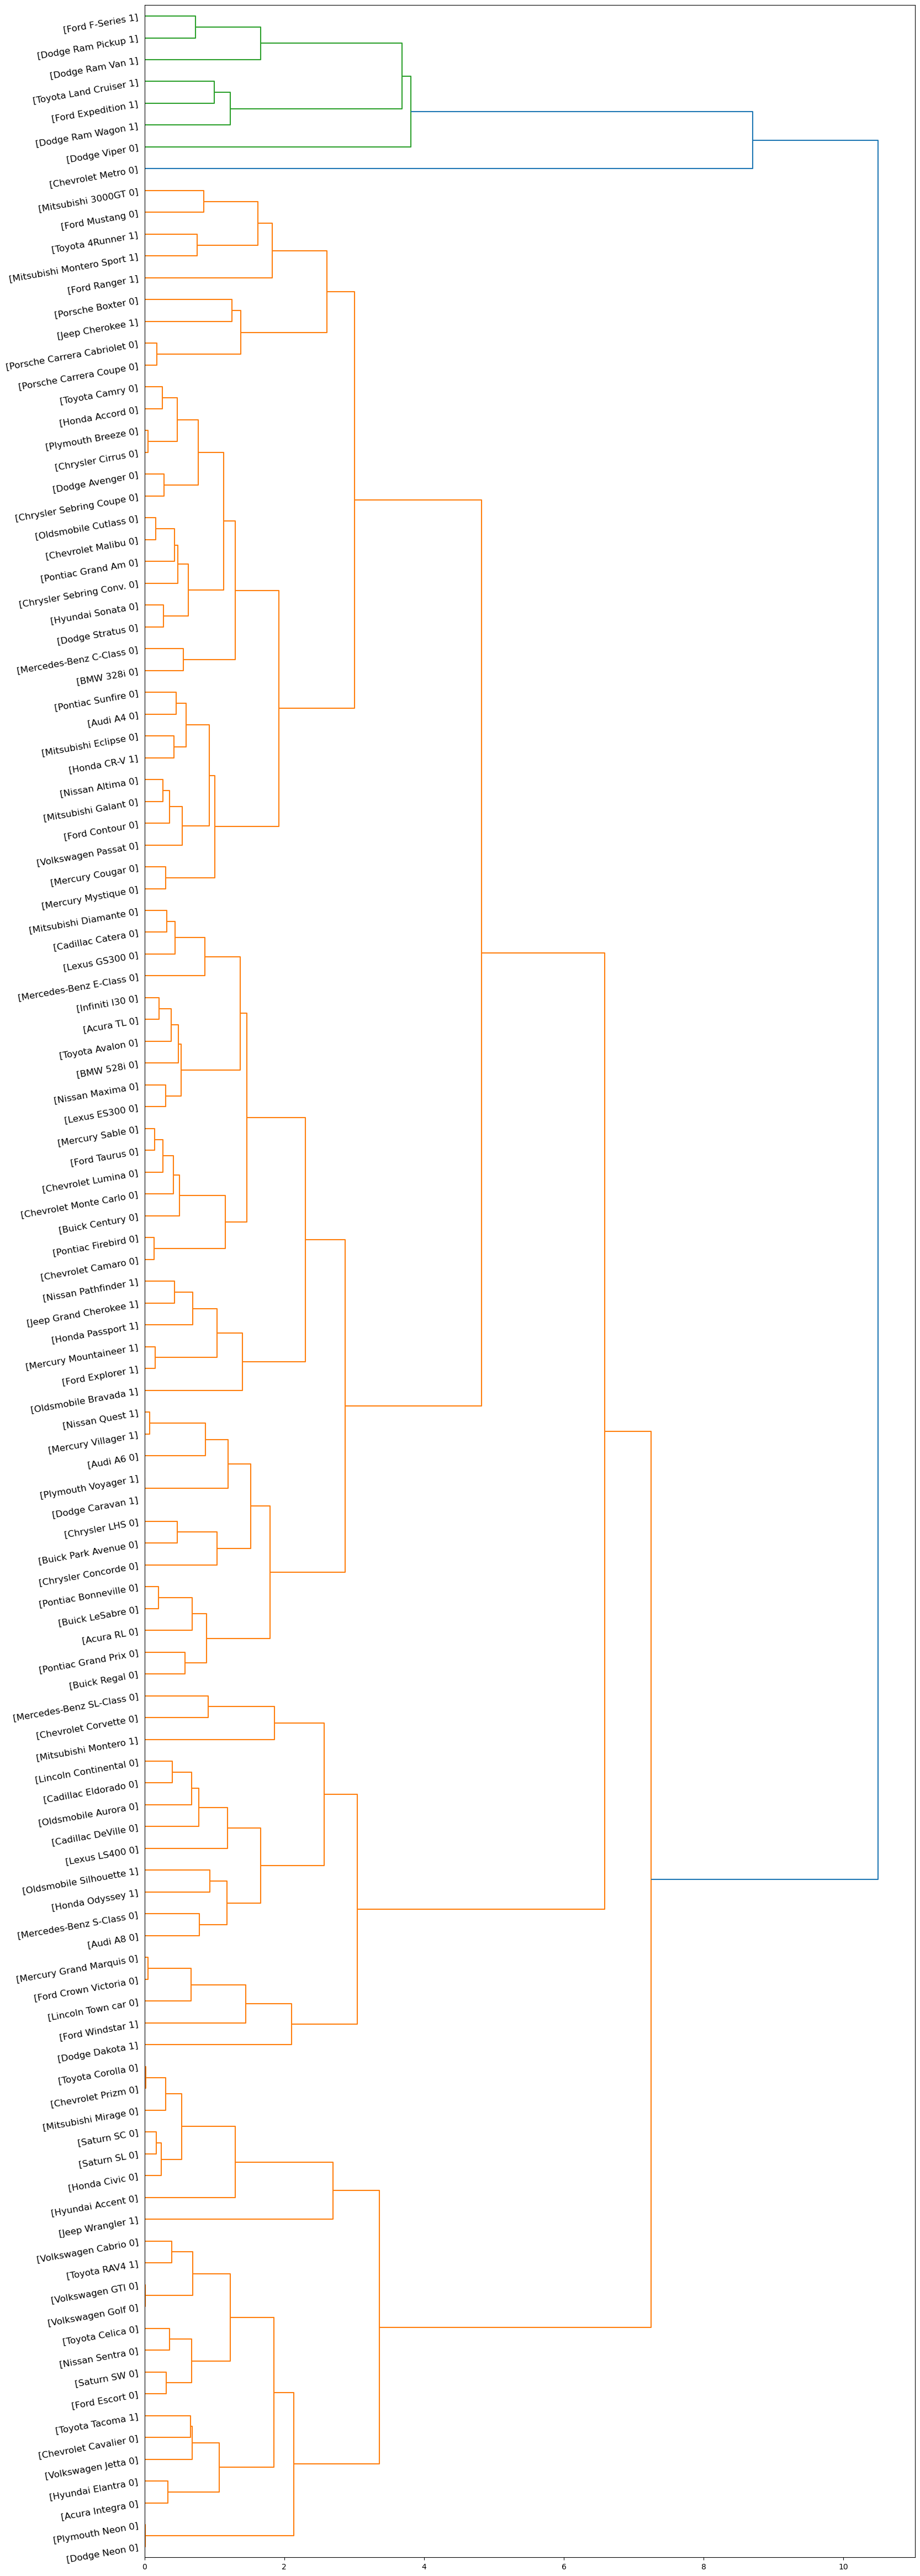

In [10]:
fig = pylab.figure(figsize=(18,60))
def rrr(id):
    return '[%s %s %s]' % (x['manufact'][id], x['model'][id],
                           int(float(x['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=rrr, leaf_rotation=10, 
                              leaf_font_size =12,
                              orientation = 'right')